In [1]:
import calculate_return as cr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from math import sqrt
import sharpe
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 1000)
plt.style.use('seaborn')
plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('figure', titlesize=13)  # fontsize of the figure title

In [6]:
# Fetching baseline data
ports = cr.fetch_returns('garch', range(10000), PAY_TAXES=True)

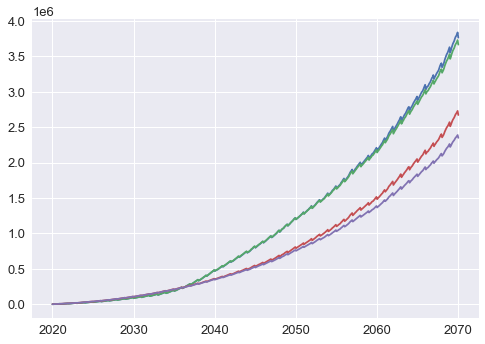

In [3]:
plt.plot(ports.groupby(level=1).mean().loc[:, ['dual_phase', 'single_phase', '100', '9050']])

In [38]:
ports['savings_cum'] = ports.groupby(level=0, as_index=False).apply(lambda x: x.savings.cumsum()).reset_index(level=0, drop=True)

In [60]:
ports['total_return_dual_phase'] = ports.groupby(level=0, as_index=False).apply(lambda x: x.dual_phase/x.savings.cumsum()).reset_index(level=0, drop=True).pct_change().fillna(0)
ports['total_return_single_phase'] = ports.groupby(level=0, as_index=False).apply(lambda x: x.single_phase/x.savings_cum).reset_index(level=0, drop=True).pct_change().fillna(0)

In [61]:
ports['total_return_dual_phase'].describe()

count   601000.000
mean           inf
std            nan
min      -1748.438
25%         -0.028
50%          0.010
75%          0.046
max            inf
Name: total_return_dual_phase, dtype: float64

In [55]:
ports[ports.total_return_dual_phase == ports.total_return_dual_phase.min()]

,,savings,cash,new_equity,new_debt,total_debt,nip,pv_p,interest,market_returns,pv_u,tv_u,equity,dst,phase,pi_hat,g_hat,SU_debt,Nordnet_debt,rf,rm,pi_rf,pi_rm,dual_phase,single_phase,100,9050,total_return_dual_phase,total_return_single_phase,total_return_100,total_return_9050,savings_cum
random_state,period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
347,2054-08-01,1604,0,1604,0,222937,1604.898,224559,511,-0.145,191562.248,191562,-31374.861,748773,1,0.230,-7.106,38264.683,184672.425,0.002,0.002,0.952,0.899,-31374.861,-31374.861,261412,355615,-1748.438,-1748.438,0.480,0.654,544098


In [58]:
import datetime as dt

In [7]:
sharpe_ratio = sharpe.calculate_sharpe(ports)

6010000
5965121


In [21]:
ports[ports.total_return_dual_phase == ports.total_return_dual_phase.min()]

,,savings,cash,new_equity,new_debt,total_debt,nip,pv_p,interest,market_returns,pv_u,tv_u,equity,dst,phase,pi_hat,g_hat,SU_debt,Nordnet_debt,rf,rm,pi_rf,pi_rm,dual_phase,single_phase,100,9050,total_return_dual_phase,total_return_single_phase,total_return_100,total_return_9050
random_state,period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1845,2043-03-01,1567,0,1567,0,227574,1567.100,229141,529,0.094,250141.579,250141,22567.098,748773,1,0.300,10.084,51585.893,175988.589,0.002,0.002,0.952,0.899,22567.098,22567.098,185369,226029,-77696.739,-77696.739,0.099,0.060


In [22]:
ports.loc[(1845, slice(None)), :]

savings    cash  new_equity  new_debt  total_debt  \
random_state period                                                          
1845         2020-01-01      450       0         450       450         450   
             2020-02-01      457       0         457       457         907   
             2020-03-01      465       0         465       485        1393   
             2020-04-01      473       0         473       678        2072   
             2020-05-01      481       0         481       438        2510   
             2020-06-01      488       0         488       456        2967   
             2020-07-01      496       0         496       366        3334   
             2020-08-01      503       0         503       633        3967   
             2020-09-01      511       0         511       537        4504   
             2020-10-01      519       0         519       540        5045   
             2020-11-01      526       0         526       799        5844   
             2020-12-01      534       0         534       541        6386   
             2021-01-01      541       0         541      1360        7747   
             2021-02-01      548       0         548         0        7747   
             2021-03-01      556       0         556         0        7747   
             2021-04-01      563       0         563         0        7747   
             2021-05-01      570       0         570         0        7747   
             2021-06-01      578       0         578         0        7747   
             2021-07-01      585       0         585       734        8482   
             2021-08-01      592       0         592       551        9033   
             2021-09-01      599       0         599       901        9935   
             2021-10-01      606       0         606       436       10371   
             2021-11-01      614       0         614      1254       11625   
             2021-12-01      621       0         621       479       12105   
             2022-01-01      628       0         628       944       13050   
             2022-02-01      635       0         635         0       13050   
             2022-03-01      642       0         642         0       13050   
             2022-04-01      649       0         649         0       13050   
             2022-05-01      656       0         656        33       13083   
             2022-06-01      663       0         663      1501       14585   
             2022-07-01      669       0         669      2337       16923   
             2022-08-01      676       0         676      2272       19195   
             2022-09-01      683       0         683       201       19396   
             2022-10-01      690       0         690         0       19396   
             2022-11-01      696       0         696      1536       20933   
             2022-12-01      703       0         703       854       21788   
             2023-01-01      710       0         710      1505       23293   
             2023-02-01      717       0         717         0       23293   
             2023-03-01      723       0         723         0       23293   
             2023-04-01      730       0         730         0       23293   
             2023-05-01      736       0         736         0       23293   
             2023-06-01      743       0         743         0       23293   
             2023-07-01      749       0         749       461       23755   
             2023-08-01      756       0         756      2098       25853   
             2023-09-01      762       0         762       663       26517   
             2023-10-01      769       0         769      2379       28896   
             2023-11-01      775       0         775         0       28896   
             2023-12-01      781       0         781      1077       29974   
             2024-01-01      788       0         788       637       30611   
             2024-02-01      794       0       

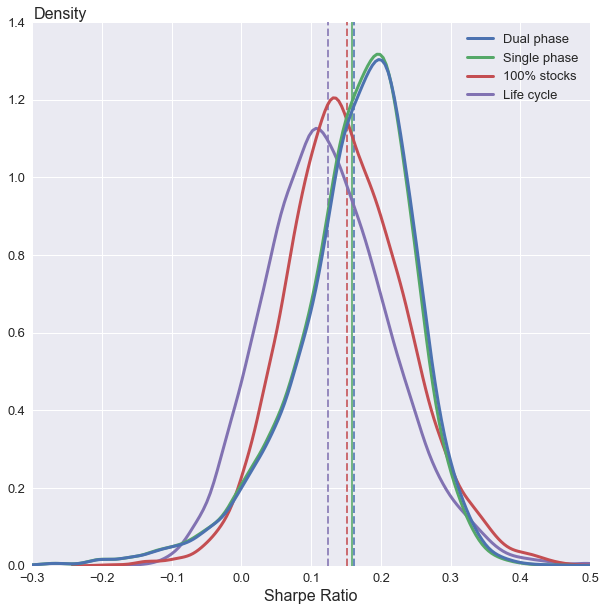

In [17]:
f, ax = plt.subplots(figsize=(10,10))
ax = sns.kdeplot(data = sharpe_ratio, linewidth = 3)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
ax.set_ylabel("Density", loc='top', rotation=0, labelpad=-80)
ax.set_xlabel("Sharpe Ratio")
ax.set_ylim(0, 1.4)
ax.set_xlim(-0.3, 0.5)
for i, strategy in enumerate(['Dual phase', 'Single phase', '100% stocks', 'Life cycle']):
    if strategy == "Single phase":
        ax.vlines(sharpe_ratio[strategy].mean(), ymin= 0, ymax=1.4, color = cycle[i], linestyle="solid", alpha = 0.8, linewidth = 2)
    else:
        ax.vlines(sharpe_ratio[strategy].mean(), ymin= 0, ymax=1.4, color = cycle[i], linestyle="--", alpha = 0.8, linewidth = 2)
#f.savefig("Empirical/sharpe_distribution.png", bbox_inches = 'tight', pad_inches = 0.1)

### Removing defaulted investors

In [12]:
zz = ports.loc[(slice(None), '2070-01-01'),:]
zzz = zz[zz['tv_u'] > 0].reset_index()
non_defaulted=zzz['random_state'].tolist()
non_defaulted_df=ports.loc[non_defaulted,:]


In [16]:
sharpe_ratio_no_def = sharpe.calculate_sharpe(non_defaulted_df)

<AxesSubplot:ylabel='Density'>

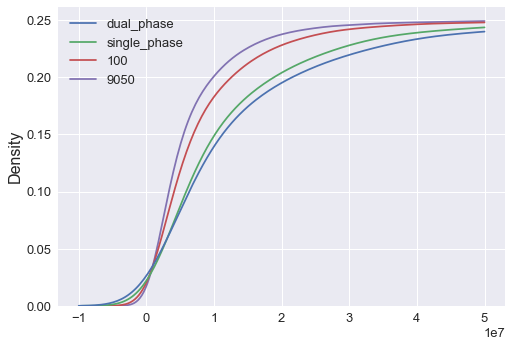

In [38]:
sns.kdeplot(data = ports.loc[(slice(None), '2070-01-01'), ['dual_phase', 'single_phase', '100', '9050']], clip=(-1e7, 5e7), cumulative=True)

In [34]:
sharpe_ratio.describe()

,Dual phase,Single phase,100% stocks,Life cycle
count,1987.000,1987.000,1987.000,1987.000
mean,0.230,0.226,0.296,0.283
std,0.171,0.169,0.111,0.119
min,-0.297,-0.298,-0.140,0.004
25%,0.146,0.144,0.221,0.198
50%,0.266,0.263,0.285,0.274
75%,0.346,0.339,0.366,0.363
max,0.671,0.657,0.740,0.746


In [33]:
ports.loc[(slice(None), '2070-01-01'), ['dual_phase', 'single_phase', '100', '9050']].describe()

NameError: name 'sharpe_ratios' is not defined

In [54]:
df = ports
df['total_return_dual_phase'] = df.groupby(level=0, as_index=False).apply(lambda x: x.dual_phase/x.savings.cumsum()).reset_index(level=0, drop=True)

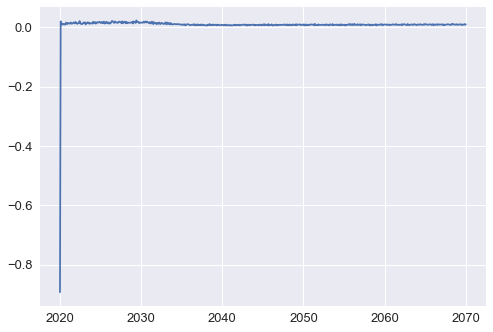

In [59]:
plt.plot(df.total_return_dual_phase.pct_change().groupby(level=1).median())

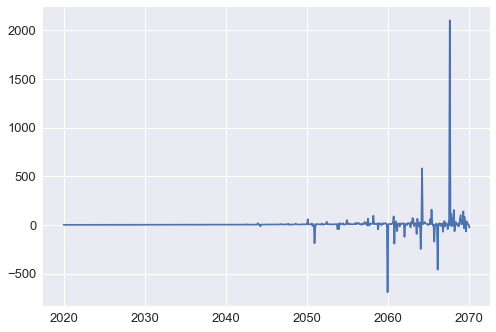

In [43]:
plt.plot(df['total_return_dual_phase'].groupby(level=1).mean())

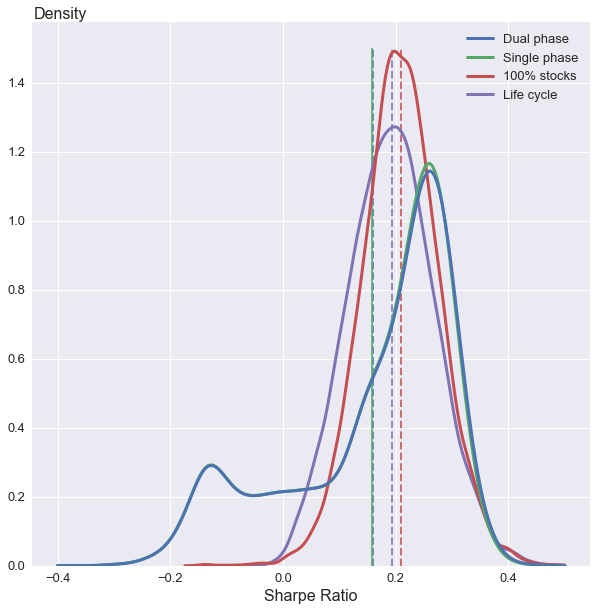

In [17]:
f, ax = plt.subplots(figsize=(10,10))
ax = sns.kdeplot(data = sharpe_ratio_no_def, linewidth = 3, clip= (-0.4, 0.5))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
ax.set_ylabel("Density", loc='top', rotation=0, labelpad=-80)
ax.set_xlabel("Sharpe Ratio")
for i, strategy in enumerate(['Dual phase', 'Single phase', '100% stocks', 'Life cycle']):
    if strategy == "Single phase":
        ax.vlines(sharpe_ratio_no_def[strategy].mean(), ymin= 0, ymax=1.5, color = cycle[i], linestyle="solid", alpha = 0.8, linewidth = 2)
    else:
        ax.vlines(sharpe_ratio_no_def[strategy].mean(), ymin= 0, ymax=1.5, color = cycle[i], linestyle="--", alpha = 0.8, linewidth = 2)
#f.savefig("Empirical/sharpe_distribution.png", bbox_inches = 'tight', pad_inches = 0.1)

In [9]:
sharpe.CE_ports(ports)

,dual_phase,single_phase,100,9050
Certainty Equivalent,"1,898,030.635446","1,988,516.720619","1,163,905.354848","1,584,289.854901"


In [91]:
ports.loc[(1, slice(None)), :].savings.cumsum().max()

832764

In [212]:
cum_savings = ports.loc[(1, slice(None)), :].savings.cumsum().max()

In [139]:
ports['100']/ports.loc[(slice(None), '2070-01-01'), '100'].groupby(level=0).mean()

random_state  period    
0             2020-01-01   0.001
              2020-02-01   0.001
              2020-03-01   0.002
              2020-04-01   0.003
              2020-05-01   0.004
                            ... 
399           2069-09-01   1.012
              2069-10-01   0.885
              2069-11-01   0.975
              2069-12-01   0.986
              2070-01-01   1.000
Name: 100, Length: 240400, dtype: float64

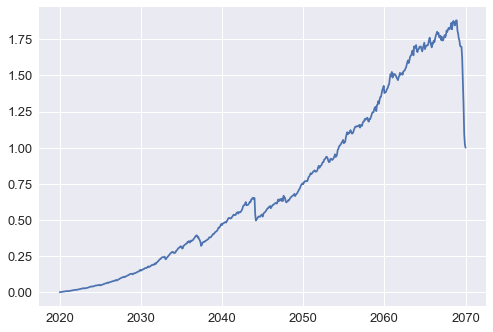

In [213]:
plt.plot((ports['100']/ports.loc[(slice(None), '2070-01-01'), '100'].groupby(level=0).mean()).groupby(level=1).mean())

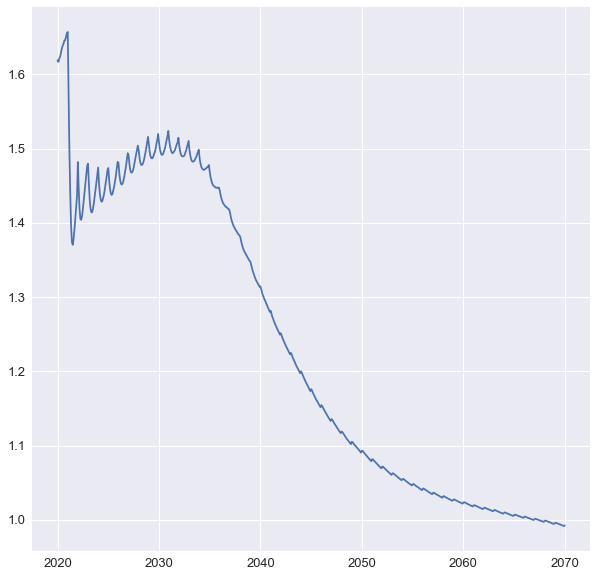

In [306]:
f, ax = plt.subplots(figsize=(10,10))
ax.plot((ports.pv_u/ports.pv_u.groupby(level=0).max()).groupby(level=1).mean()/(ports['100']/ports['100'].groupby(level=0).max()).groupby(level=1).mean())
#ax.plot((ports.pv_u/ports.pv_u.groupby(level=0).max()).groupby(level=1).mean())
#ax.plot((ports['100']/ports['100'].groupby(level=0).max()).groupby(level=1).mean())

In [234]:
limit = 250000

In [215]:
ports['end_pv_u'] = ports.groupby(level=0).take([-1])[['dual_phase']].reset_index(level=0, drop=True)

In [216]:
ports.end_pv_u = ports.end_pv_u.bfill()

In [217]:
ports['end_100'] = ports.groupby(level=0).take([-1])[['100']].reset_index(level=0, drop=True)

In [218]:
ports.end_100 = ports.end_100.bfill()

In [235]:
ports = ports[ports['end_pv_u'].abs() > limit]
ports = ports[ports['end_100'].abs() > limit]

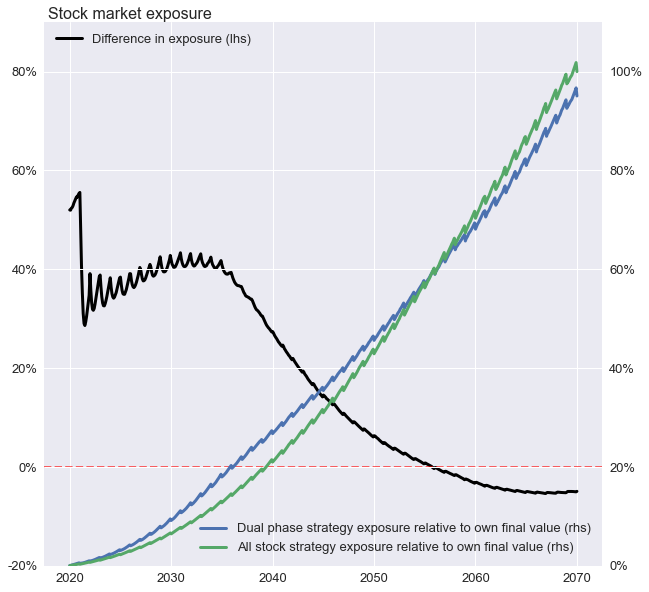

In [369]:
f, ax = plt.subplots(figsize=(10,10))
ax.plot((ports['pv_u']*100/ports['end_pv_u']).groupby(level=1).mean()/(ports['100']/ports['end_100']).groupby(level=1).mean()-100, color='black', linewidth = 3)
ax2 = ax.twinx()
ax2.plot((ports['pv_u']*100/ports['end_pv_u']).groupby(level=1).mean(), linewidth = 3)
ax2.plot((ports['100']*100/ports['end_100']).groupby(level=1).mean(), linewidth = 3)
ax.set_ylim(-20, 90)
ax2.set_ylim(0, 110)
ax.axhline(0, color = 'red', linestyle='dashed', linewidth=2, alpha = .6)
ax.set_ylabel("Stock market exposure", rotation=0, loc='top', labelpad=-205) 
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: f'{x:.0f}%'))
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: f'{x:.0f}%'))
ax2.legend(['Dual phase strategy exposure relative to own final value (rhs)', 'All stock strategy exposure relative to own final value (rhs)'], loc='lower right')
ax.legend(['Difference in exposure (lhs)'], loc='upper left')
f.savefig('Empirical/stock_market_exposure.png', bbox_inches = 'tight', pad_inches = 0.1)

In [244]:
df = ports
df['total_return_dual_phase'] = df.groupby(level=0, as_index=False).apply(lambda x: x.dual_phase/x.savings.cumsum()).reset_index(level=0, drop=True)


random_state
1       3.669
2      12.813
3       1.686
4       2.433
5       0.244
        ...  
9995    0.441
9996    0.277
9997    0.267
9998    3.093
9999    0.652
Name: total_return_dual_phase, Length: 9643, dtype: float64

In [261]:
df['total_return_100'] = df.groupby(level=0, as_index=False).apply(lambda x: x['100']/x.savings.cumsum()).reset_index(level=0, drop=True)

<AxesSubplot:xlabel='total_return_dual_phase', ylabel='Density'>

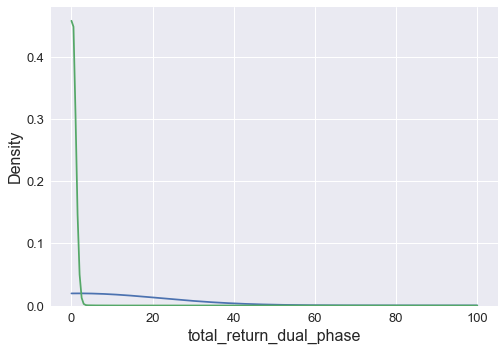

In [262]:
sns.kdeplot(data = df.total_return_dual_phase.groupby(level=0).pct_change().groupby(level=0).std()*sqrt(12), clip=(0, 100))
sns.kdeplot(data = df.total_return_100.groupby(level=0).pct_change().groupby(level=0).std()*sqrt(12), clip=(0, 100))

<AxesSubplot:xlabel='total_return_dual_phase', ylabel='Density'>

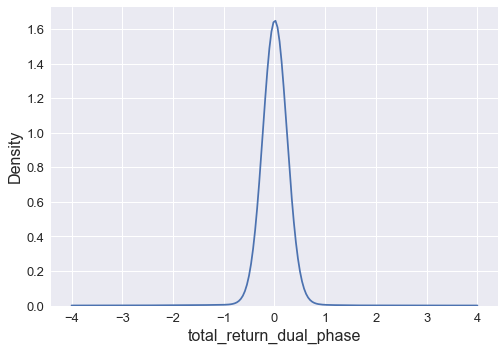

In [259]:
sns.kdeplot(data = df.total_return_dual_phase.groupby(level=0).pct_change().groupby(level=0).mean(), clip=(-4, 4))

In [247]:
(df.total_return_dual_phase.groupby(level=0).pct_change().groupby(level=0).std()*sqrt(12)).describe()

count    9643.000
mean        6.472
std       123.888
min         0.201
25%         0.317
50%         0.520
75%         1.865
max     10987.978
Name: total_return_dual_phase, dtype: float64

In [260]:
df.total_return_dual_phase.groupby(level=0).pct_change().groupby(level=0).mean()

random_state
1      -0.000
2      -0.157
3       0.005
4       0.045
5       0.007
        ...  
9995    0.012
9996    0.006
9997    0.005
9998    0.035
9999    0.005
Name: total_return_dual_phase, Length: 9643, dtype: float64